In [50]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

In [51]:
raw_data = pd.read_csv('/content/sample_data/train.csv', header=None, skiprows=1, names=['ID','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','age','gender','ethnicity','jaundice','austim','contry_of_res','used_app_before','result','age_desc','relation','Class/ASD'])

In [52]:
CATEGORICAL_COLUMNS = ['gender','ethnicity','jaundice','austim','contry_of_res','used_app_before','age_desc','relation']

In [53]:
features = CATEGORICAL_COLUMNS

In [54]:
new_raw_data = pd.get_dummies(raw_data, columns = CATEGORICAL_COLUMNS)

In [55]:
X = new_raw_data.drop('Class/ASD', axis=1).values
y = new_raw_data['Class/ASD'].values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

In [57]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

In [58]:
dt.fit(X_train, y_train)
dt.score(X_test, y_test)
y_pred = dt.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       129
           1       0.56      0.74      0.64        31

    accuracy                           0.84       160
   macro avg       0.75      0.80      0.77       160
weighted avg       0.86      0.84      0.85       160



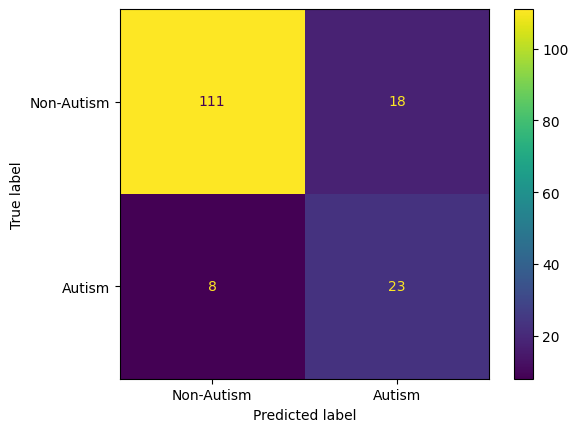

In [60]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Non-Autism', 'Autism'])

cm_display.plot()
plt.show()